# **Project - Hotel Booking Cancellation Prediction**



---------------
## **Problem Statement**

### **Context**

**A significant number of hotel bookings are called off due to cancellations or no-shows.** Typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost. This may be beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room.
2. **Additional costs of distribution channels** by increasing commissions or paying for publicity to help sell these rooms.
3. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
4. **Human resources to make arrangements** for the guests.

### **Objective**

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## **Importing the libraries required**

In [1]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

### **Viewing the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Understanding the shape of the dataset**

In [6]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### **Checking the data types of the columns for the dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate valuesmif any**

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [9]:
data = data.drop(["Booking_ID"], axis=1)

In [10]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Checking the summary statistics of the dataset**



In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations**

- The number of adults per room is an average of 2.
- The number of children  is maximum of 10. This is very unlikely.
- Some of the room don't have adults in them which is very unlikely.
- For the number of previous cancellation, the maximum is 13
- The average price per room is about 103.4. Some of the room has no price which is unlikely or are complimentary or promotional campaign by the hotel to their guests.
- The number of previous bookings not cancelled is more than those cancelled with maximum number of 58 as against 13 for the previously cancelled bookings



## **Exploratory Data Analysis**

### **Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [12]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **Plotting the histogram and box plot for the variable `Lead Time` using the hist_box function**

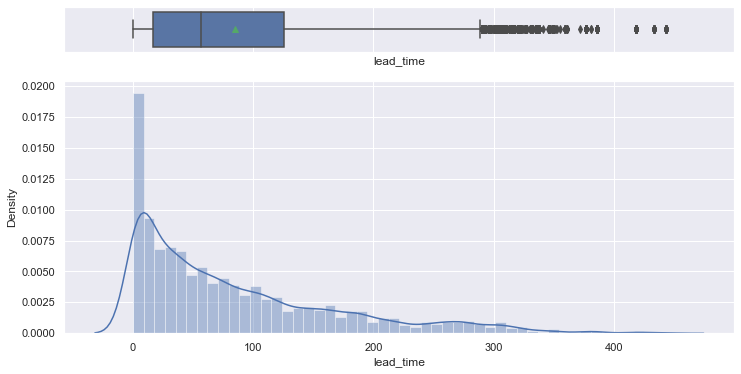

In [13]:
# Remove _________ and complete the code
hist_box(data,'lead_time') 

**Observations**
- The distribution of lead time is right skewed
- Number of days between the date of booking and the arrival date is in smaller increases.

#### **Plotting the histogram and box plot for the variable `Average Price per Room` using the hist_box function.**

In [14]:
data['avg_price_per_room'].skew()

0.6671328746979995

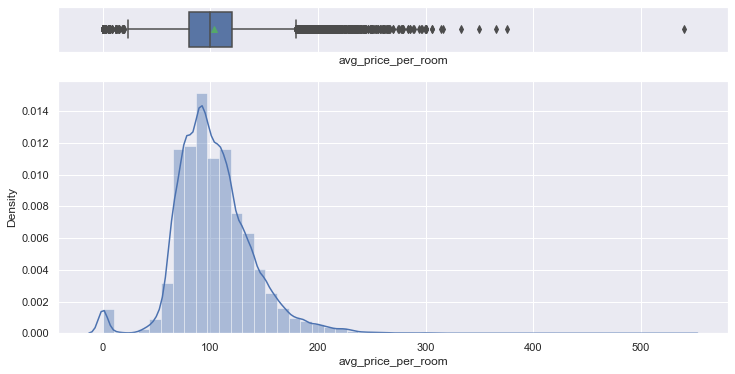

In [15]:
hist_box(data,"avg_price_per_room")

**Observation**
- The average price per room is almost normally distributed although the box plot shows some outliers.

**Interestingly some rooms have a price equal to 0. Let's check them.**

In [16]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [17]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [18]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [19]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Let's understand the distribution of the categorical variables**

**Number of Children**

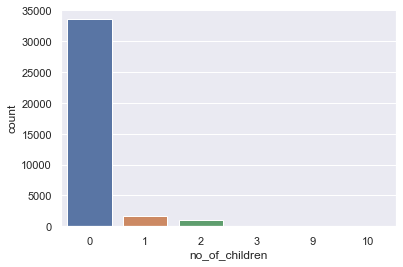

In [20]:
sns.countplot(data['no_of_children'])
plt.show()

In [21]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [22]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

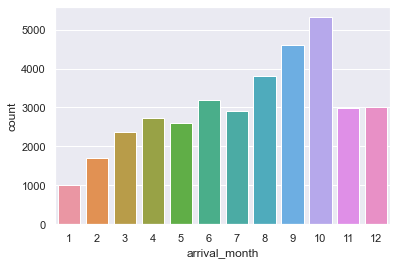

In [23]:
sns.countplot(data["arrival_month"])
plt.show()

In [24]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

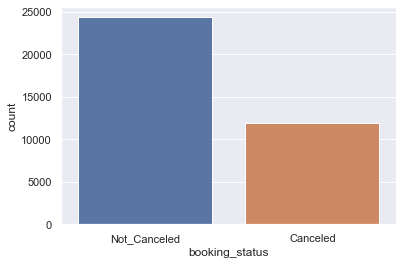

In [25]:
sns.countplot(data["booking_status"])
plt.show()

In [26]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [27]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### **Bivariate Analysis**

#### **Finding and visualizing the correlation matrix using a heatmap**

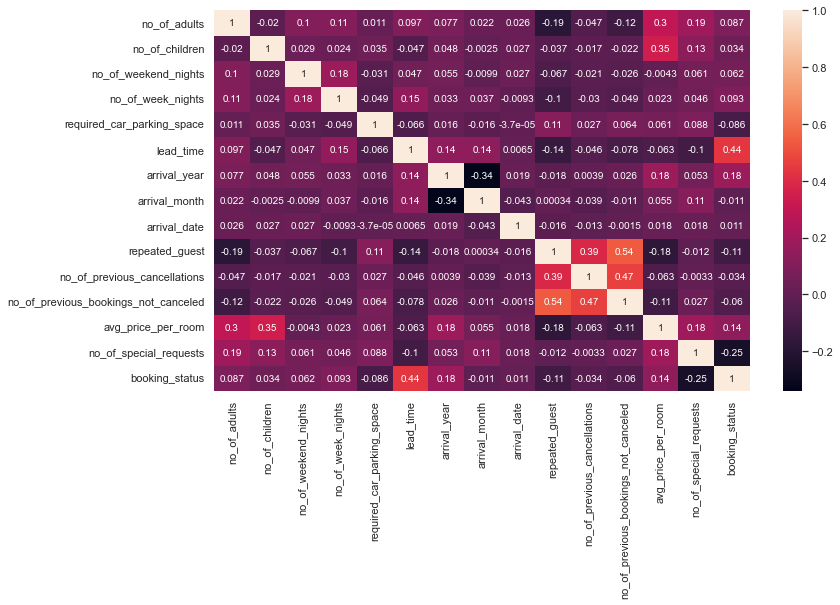

In [28]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations**

- There is some correlation between repeated guests and the number if previously booked not cancelled. This is possible as some guest that had stayed in the hotel previously had booked again and dont need to cancel maybe due to the great service they enjoyed and would like to stay at the hotel again.
- Most of the variables are independent.


**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

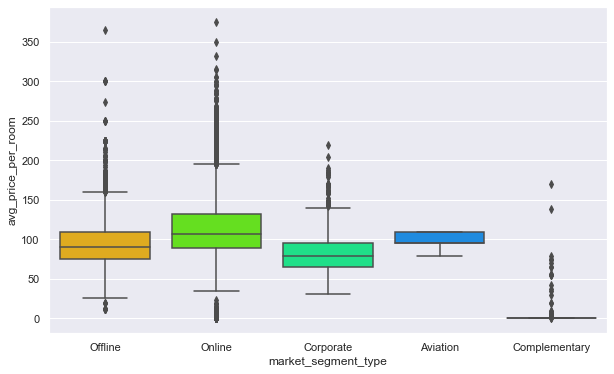

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [30]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

#### **Plotting the stacked barplot for the variable `Market Segment Type` against the target variable `Booking Status` using the stacked_barplot function**

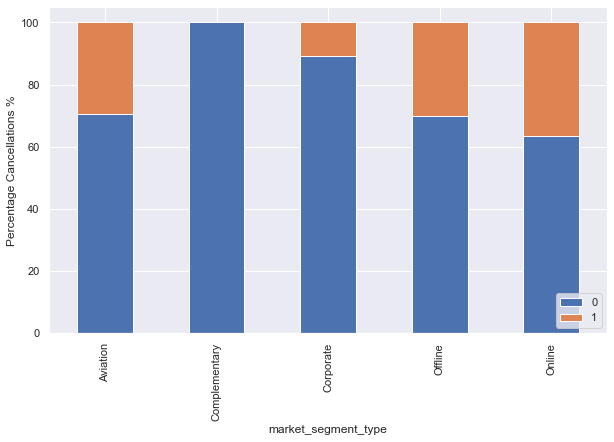

In [31]:
stacked_barplot(data,'market_segment_type','booking_status' )

**Observations**
- There are no cancellation in the complimentary market segment type. This is a complimentary service which is free and so there will be no cancellation here
- Amongst the market segment with cancellation, the percentage of cancellation for the online market segment is the highest while corporate market segment is the lowest. Cancellation of booking in Corporate organizations are not frequent unless situations beyond their control such as change of dates of their events. 


#### **Question 3.3: Plot the stacked barplot for the variable `Repeated Guest` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

Repeating guests are the guests who stay in the hotel often and are important to brand equity.

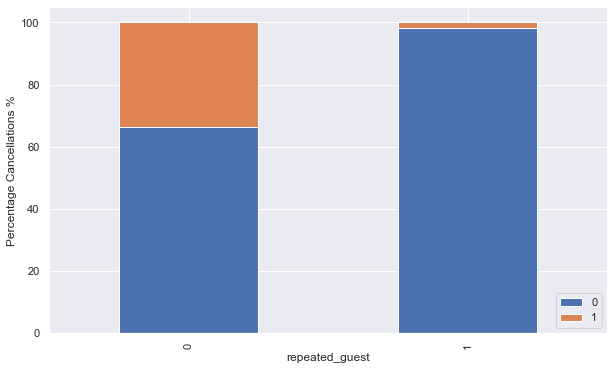

In [32]:
stacked_barplot(data, 'repeated_guest','booking_status')

**Observations**
- Repeated guest rarely cancel their reservation and if they do, it may due to situations beyond their control.
- This is because guest they had stayed in the hotel previously and had enjoyed the service of the hotel. They are comfortable with the brand of INN Hotels Group
- First time guest tends to cancel more frequently as they have not experience the service of the hotel before.


**Let's analyze the customer who stayed for at least a day at the hotel.**

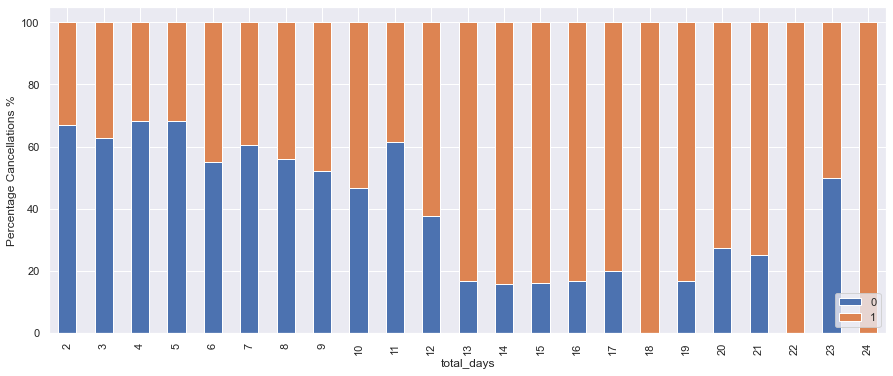

In [33]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

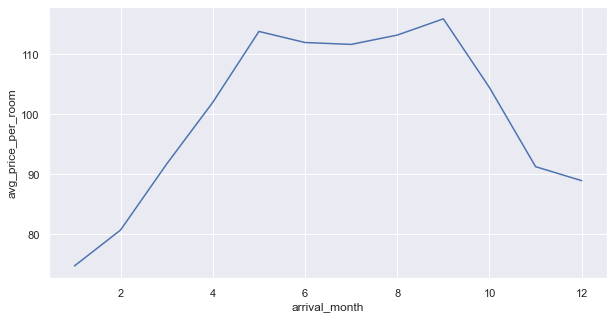

In [34]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [35]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [36]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [37]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [38]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

#### **Building a Logistic Regression model**

In [39]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

#### **Checking the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



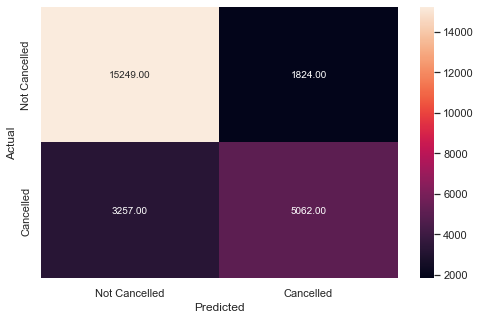

In [40]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train,y_pred_train)

**Observations**
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the hotel booking at the risk of cancellation.
- The recall for the train data is 0.61 for class 1. Let us see if this can be increased significantly with optimal threshold

Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.72      0.60      0.66      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.76     10883
weighted avg       0.79      0.79      0.79     10883



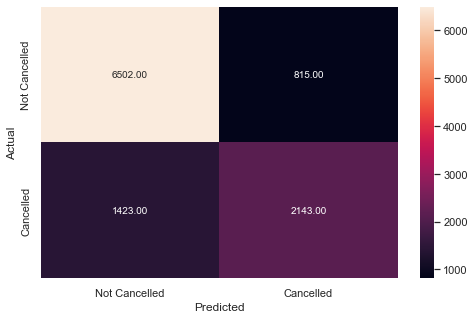

In [41]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test,y_pred_test)

**Observation** 
- The recall for the train data is 0.60 for class 1. Let us see if this can be increased significantly.


Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


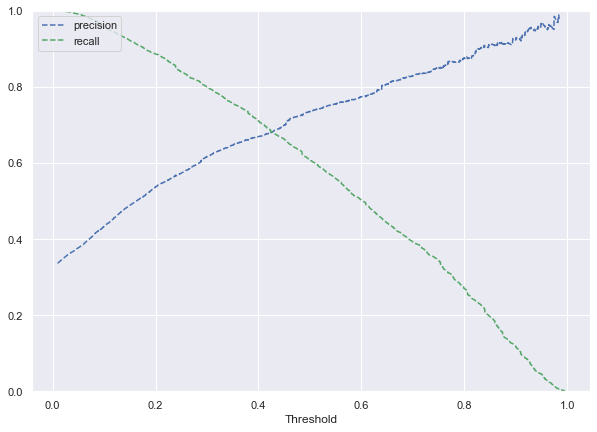

In [42]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation**
- Precision and recall are balanced for a threshold of about ~0.42


In [43]:
# Setting the optimal threshold
optimal_threshold = 0.42

#### **Checking the performance of the model on train and test data using the optimal threshold.**

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     17073
           1       0.68      0.69      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



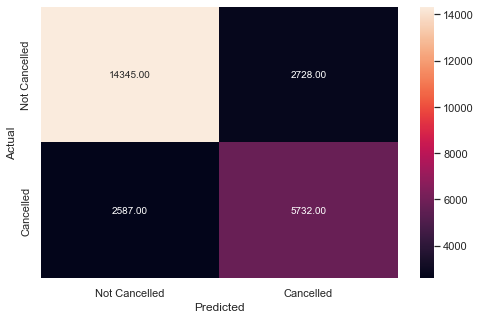

In [44]:
# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train,y_pred_train[:,1]>optimal_threshold)

**Observation**

- The model performance improved at a threhold of 0.42 on the train data. For class 1 the recall increase from 0.61 to 0.69, which is about 8% increase.

Checking the performance on the test set

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.68      0.68      3566

    accuracy                           0.79     10883
   macro avg       0.76      0.76      0.76     10883
weighted avg       0.79      0.79      0.79     10883



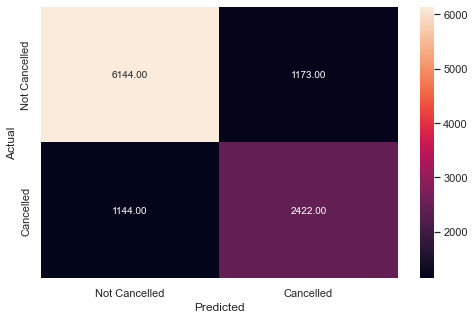

In [45]:

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test,y_pred_test[:,1]>optimal_threshold)

**Observation**

- The model performance improved for class 1 from 0.60 to 0.68, which is about 8% increase on the test data with the optimal threhold of 0.42. 


### **Building the Support Vector Machine Models**

To accelerate SVM training, let's scale the data for support vector machines.

In [46]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### **Building a Support Vector Machine model using a linear kernel (with scaled data)**

In [47]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X_train_scaled, y_train)

#### **Checking the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



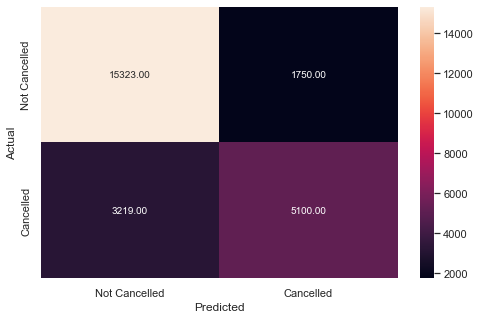

In [48]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train,y_pred_train_svm)

**Observation**
- With the SVM model with linear kernel, the recall for class 1 is about 61% and the accuracy is 80% which means the model is not overfitting
 


Checking model performance on test set

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



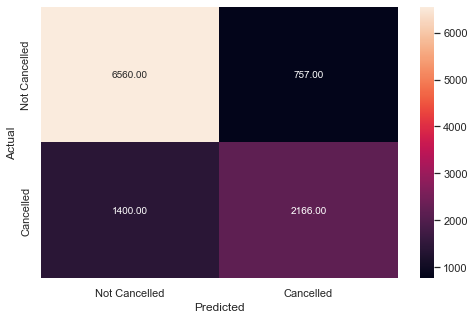

In [49]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test,y_pred_test_svm)

**Observation**
- With the SVM model with linear kernel, the recall for class 1 is about 61% and the accuracy is 80% which means the model is not overfitting

#### **Obtaining the optimal threshold for the model using the Precision-Recall Curve.**


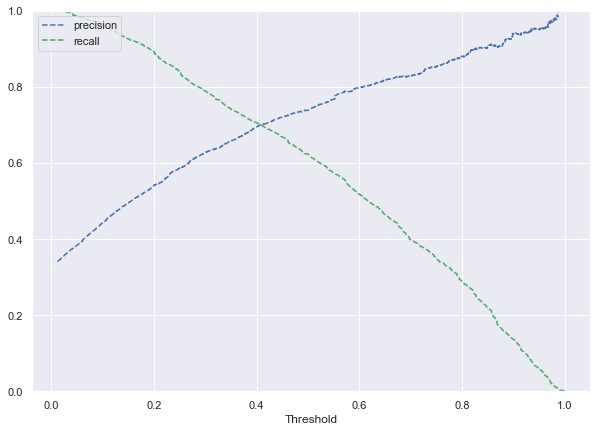

In [50]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train,y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation**
- Precision and recall are balanced for a threshold of about ~0.41


In [51]:
optimal_threshold_svm= 0.41

#### **Checking the performance of the model on train and test data using the optimal threshold.**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



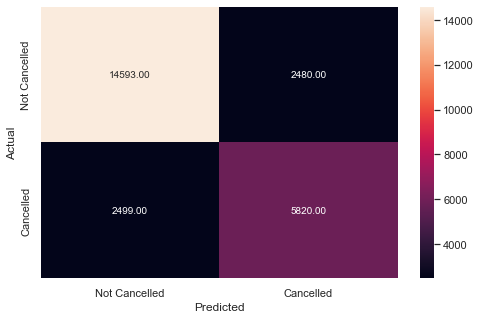

In [52]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train,y_pred_train_svm[:,1]>optimal_threshold_svm)

**Observation**
- The model performance on the train data improved from 0.61 to 0.70, an increase of about 9% on the recall for class 1 with a threshold of 0.41


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7317
           1       0.70      0.69      0.69      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



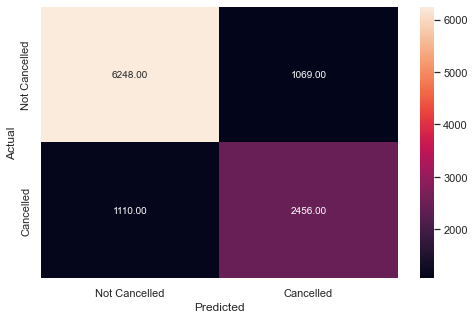

In [53]:
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test,y_pred_test[:,1]>optimal_threshold)

**Observation**
- The model performance on the test data improved from 0.61 to 0.69, an increase of about 9% on the recall for class 1 with a threshold of 0.41


#### **Building a Support Vector Machines model using an RBF kernel**

In [54]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

#### **Checking the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



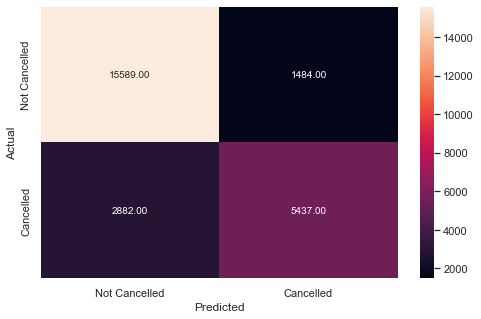

In [55]:

y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train,y_pred_train_svm)

**Observations**
- With the SVM model with rbf kernel, the recall for class 1 is about 65% on train data which is an improvement compared with the linear model. 
- The accuracy is 83% which means the model is not overfitting.


##### **Checking model performance on test set**

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



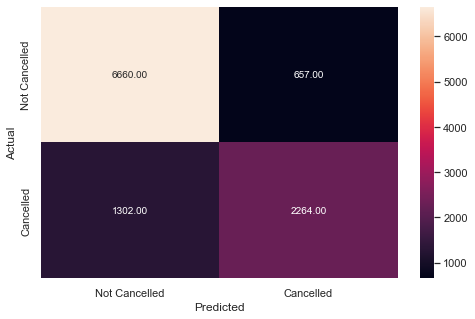

In [ ]:
y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Observations**
- With the SVM model with rbf kernel, the recall for class 1 is about 63% on test data which is an improvement compared with the linear model. 
- The accuracy is 82% which means the model is not overfitting.

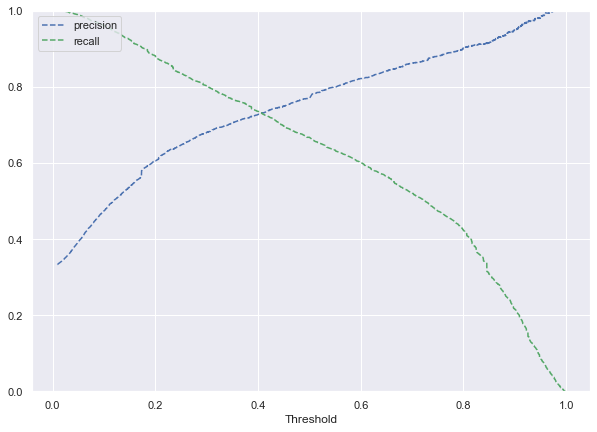

In [57]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [58]:
optimal_threshold_svm=0.41

#### **Checking the performance of the model on train and test data using the optimal threshold.**

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     17073
           1       0.73      0.73      0.73      8319

    accuracy                           0.82     25392
   macro avg       0.80      0.80      0.80     25392
weighted avg       0.82      0.82      0.82     25392



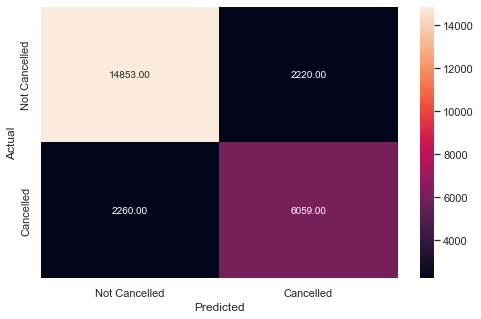

In [59]:
y_pred_train_svm = svm_rbf.predict_proba(X_train_scaled)
metrics_score(y_train,y_pred_train_svm[:,1]>optimal_threshold_svm)

**Observations**

- With optimal threhold of 0.41, the accuracy of of the model is 82% on the train data which means the model is not overfitting.
- The model performed well with a non-linear kernel (rbf)
- The model performance improved from  recall value of 0.65 to 0.73 on class 1
- As the recall is high, the model will do better in classifying the cancelled hotel bookings and the bookings that are not cancelled.


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7317
           1       0.72      0.72      0.72      3566

    accuracy                           0.82     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.82      0.82      0.82     10883



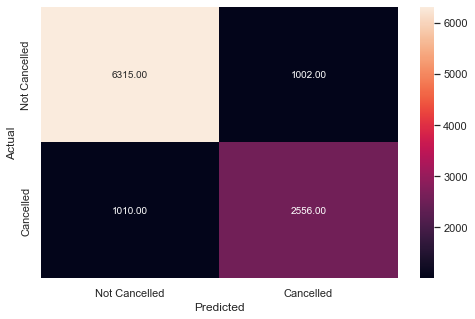

In [60]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test,y_pred_test[:,1]>optimal_threshold_svm)

**Observations**
- With optimal threhold of 0.41, the accuracy of of the model is 82% on the test data which means the model is not overfitting.
- The model performed well with a non-linear kernel (rbf)
- The model performance improved from  recall value of 0.63 to 0.72 on class 1
- As the recall is high, the model will do better in classifying the cancelled hotel bookings and the bookings that are not cancelled.

#### **Building a Decision Tree Model**

In [61]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



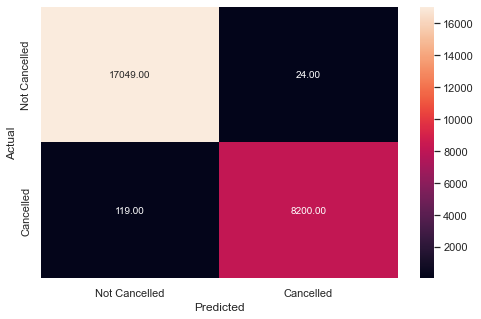

In [62]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Observations**
- The accuracy score is 99% with a recall of 0.99. On the training data, almost all the samples were classified correctly
- The model performance is great on the training data.


#### **Checking model performance on test set**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.79      0.79      0.79      3566

    accuracy                           0.86     10883
   macro avg       0.85      0.84      0.85     10883
weighted avg       0.86      0.86      0.86     10883



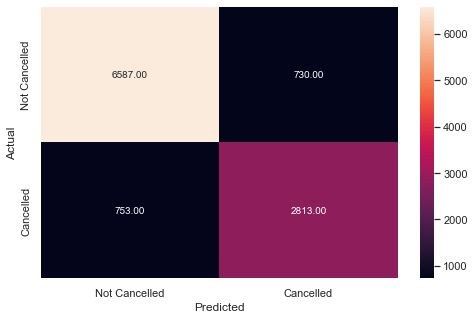

In [63]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test,pred_test_dt)

**Observations**
- The recall for class one dropped from 100% to 79% which means the model is overfitting on the training data and underperformed on the test data. The accuracy of the model performance also dropped significantly.
- Although the model is overfitting, with a recall of 0.79 on class 1,  it has a better performance compared with Logistic Regression and SVM. 
- The precision on the test data suggests that there's a 21% (1 - 0.79) chance that the model will predict that an hotel booking will be cancelled even when it woul not making the comapny waste resources to manage the bookings.
- To reduce overfitting, we have to tune the parameters of the decision tree.



 #### **Performing hyperparameter tuning for the decision tree model using GridSearch CV**

In [64]:


# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Checking the performance of the model on the train and test data using the tuned model**

##### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.68      0.75      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.82     25392
weighted avg       0.85      0.85      0.84     25392



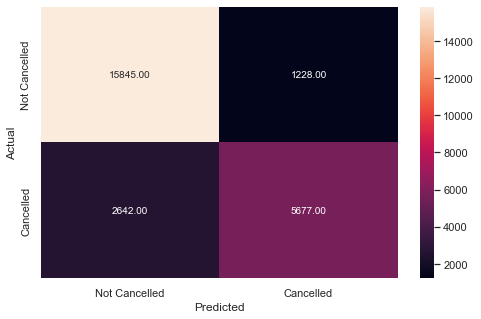

In [65]:

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

**Observations**
- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- With an accuracy score of 85%, the tuning of the parameters has ensured the model is not overfitting.
- The recall has reduced to 0.68 from 0.79.


##### Checking performance on the test data set

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7317
           1       0.82      0.67      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.84      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



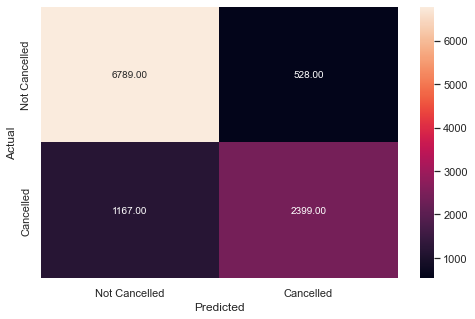

In [66]:

# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observations**
- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- With an accuracy score of 84%, the tuning of the parameters has ensured the model is not overfitting.
- The recall has reduced to 0.68 from 0.79 which means that the performance of the model on test data has not improved

#### **Visualizing the Decision Tree**

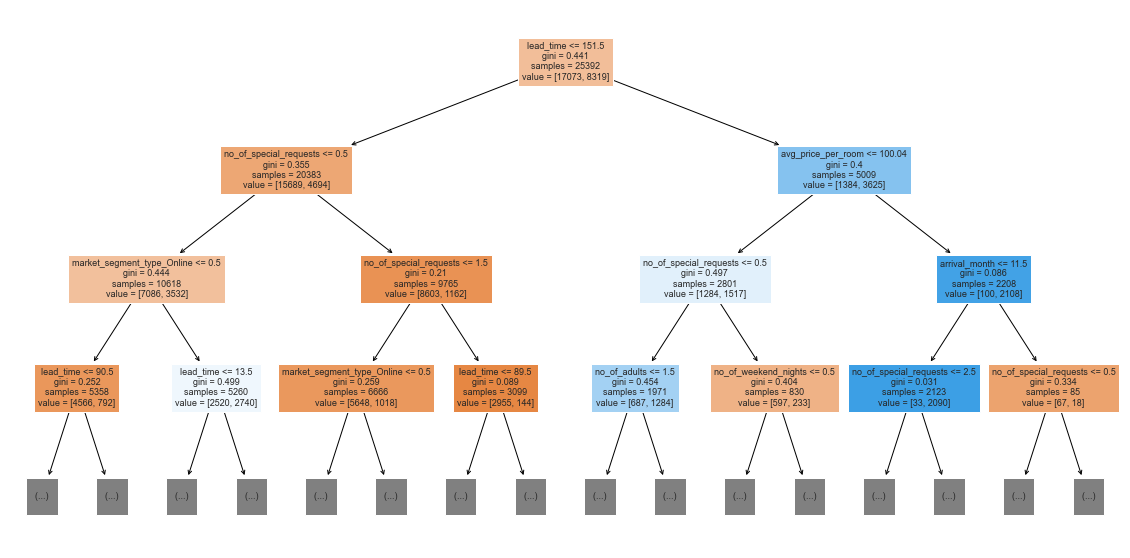

In [67]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Some important features based on the tuned decision tree**

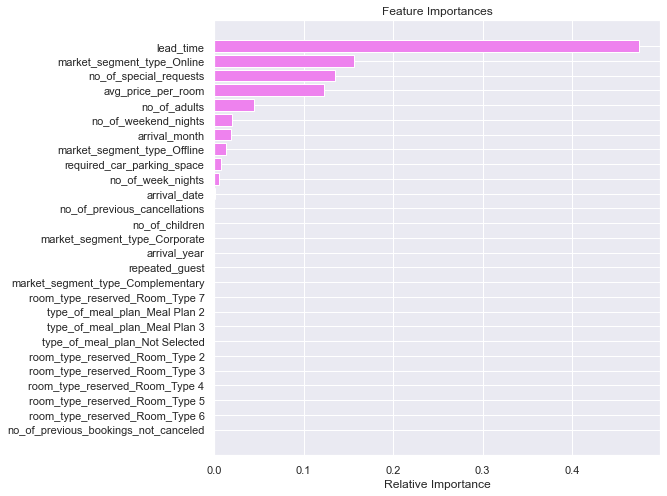

In [68]:

# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*  After tuning the model, we found out that only 9 features are important with about 4 of them having higher relative importance. The model seem to **have high bias** as it has over-simplified the problem and is not capturing the patterns associated with other variables.

* We observe that the 4 most important features that describes why hotel booking are cancelled are:
    * Lead time
    * Online Market Segment Type
    - Average price per room
    - Number of Special guest


___

#### **Building a Random Forest Model**

In [69]:

rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### To check the performance of the model on the train and test data**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



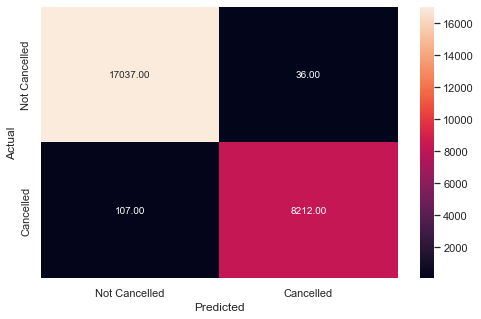

In [ ]:

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train_rf)

**Observation**

- Almost all the samples on the training dataset were correctly classified with a 99% accuracy
- The model performed well on the training data


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



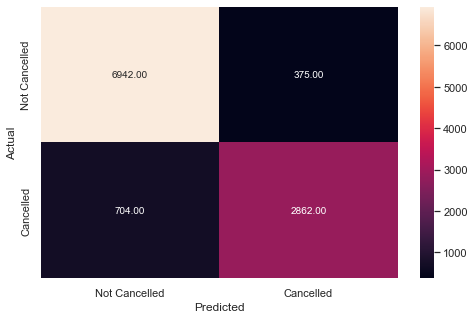

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test_rf)

**Observation**
- The model seem to be overfitting the training data as the model performance reduced on the test data as compared with training data.
- Although the model is overfitting, with a recall of 0.80 on class 1, it has a better performance compared with Logistic Regression and SVM.
- The parameters of the random forest should be tuned to reduce overfitting and improve the recall.


Let's check the feature importance of the Random Forest

<AxesSubplot:xlabel='Importance'>

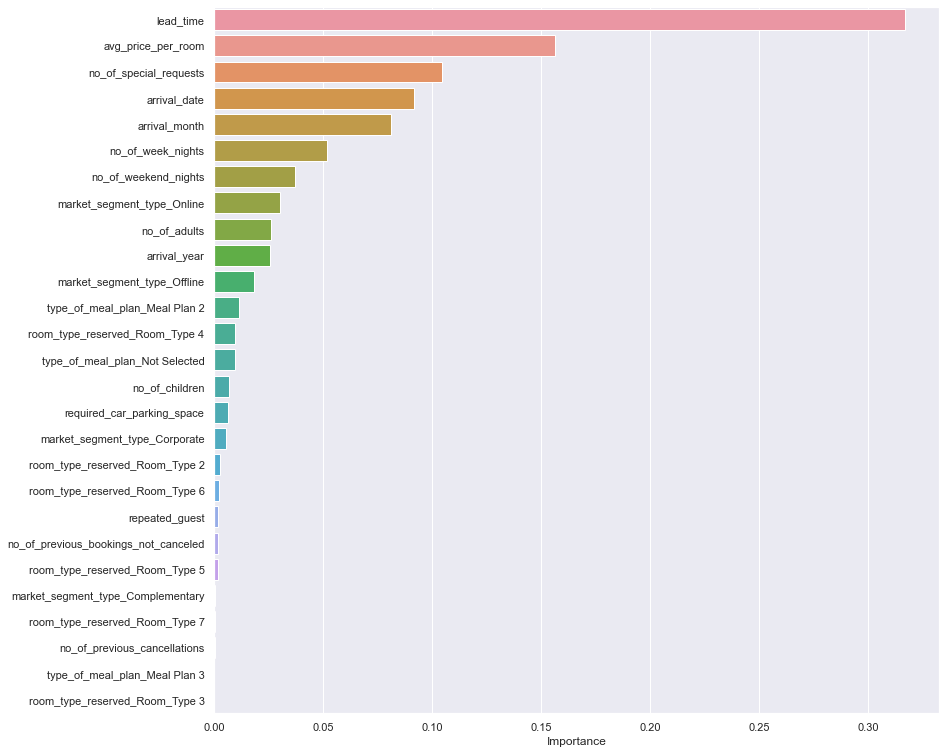

In [ ]:

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances,index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

##### **Observation**

- The Random Forest further verifies the results from the decision tree, that the most important features are lead time, average price per room and number of special guests.
- Lead time is most important feature. If the lead time of booking the hotel is high the client is most likely to cancel the hotel booking.
- Average price per room is also a key feature, as high price can make a client cancel the hotel bookings for a cheaper rate.
- The model **is not bias** as it takes into consideration more important features compared with the decision tree model


**Recommendations**
- From our analysis, the average price per room is one of the reasons why hotels bookings are cancelled. The company should try to reduce the prices of the rooms when it is not the peak periods and make these prices during peak periods (between May and October) reasonably lower than their competitors to retain hotel bookings. If their prices are considerably lower with low impact on their profit margin, they tend to have more bookings that are not cancelled and have higher number of repeated guests.
- The company should carry out frequent campaigns and complimentary services to attract more clients in each market segment especially the online segment. Rooms booked online have high variations in prices and they also tend to cancel their bookings more frequently than other segments. Lower prices and frequent online campaigns can help retain the bookings of the online segments.
- To make first time guests a repeated guest, INN Hotel should make their customers feel amazing and special by frequently communicating with them. This may be in form of emails, paid questionnaires and surveys, discounts on hotel room for the client and their referrals. As the number of hotels booking cancellation from repeated guest is quite low, ensuring the first-time guest are converted to frequent guest will help reduce the booking cancellations and retain more customers.
- The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases. For bookings with longer stay, INN Group should propose more services. The INN Group can propose complimentary dinner for booking that tend to stay for more than 5 days while others enjoy only complimentary breakfast. They might also propose discount for longer stays which would tend to sway the client in INN Group's favor to not cancel their bookings and enjoy these complimentary services.
